# CNN Apply on CIFAR Datasets

Here we will train a CNN to classify images from the CIFAR-10 dataset.
1. Load CIFAR-10 Database

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


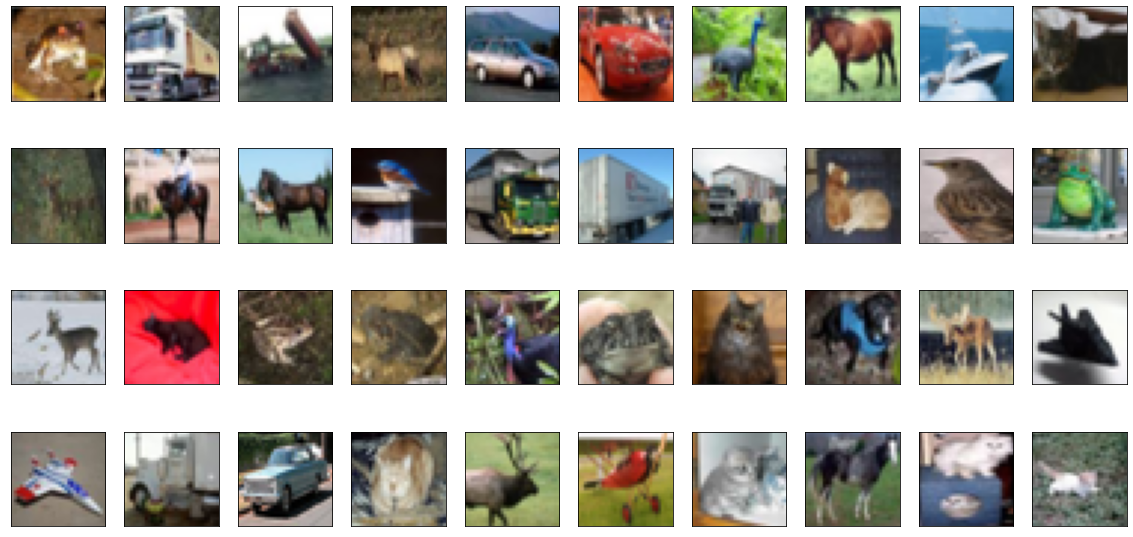

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,10))
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

3. Rescale the Images by Dividing Every Pixel in Every Image by 255
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [8]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

4. Break Dataset into Training, Testing, and Validation Sets

In [9]:
#from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


5. Define the Model Architecture

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)          0         
__________

6. Compile the Model

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

7. Train the Model

In [15]:
history=model.fit(x_train, y_train,epochs=20,verbose=1,validation_data=(x_valid, y_valid),shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 29s 641us/step - loss: 1.6214 - acc: 0.4039 - val_loss: 1.3177 - val_acc: 0.5316
Epoch 2/20
45000/45000 [==============================] - 28s 623us/step - loss: 1.3041 - acc: 0.5317 - val_loss: 1.1142 - val_acc: 0.6102
Epoch 3/20
45000/45000 [==============================] - 28s 617us/step - loss: 1.1858 - acc: 0.5756 - val_loss: 1.0277 - val_acc: 0.6486
Epoch 4/20
45000/45000 [==============================] - 28s 623us/step - loss: 1.1035 - acc: 0.6052 - val_loss: 0.9523 - val_acc: 0.6652
Epoch 5/20
45000/45000 [==============================] - 28s 629us/step - loss: 1.0485 - acc: 0.6264 - val_loss: 0.9290 - val_acc: 0.6746
Epoch 6/20
45000/45000 [==============================] - 28s 630us/step - loss: 1.0035 - acc: 0.6452 - val_loss: 0.8916 - val_acc: 0.7020
Epoch 7/20
45000/45000 [==============================] - 28s 625us/step - loss: 0.9664 - acc: 0.6571 - val_loss: 0.8

In [16]:
pd.DataFrame(history.history)

,val_loss,val_acc,loss,acc
0,1.317666,0.5316,1.621401,0.403933
1,1.114201,0.6102,1.304064,0.531733
2,1.027685,0.6486,1.185767,0.575644
3,0.952269,0.6652,1.103516,0.605244
4,0.928962,0.6746,1.048505,0.626422
5,0.891627,0.7020,1.003462,0.645222
6,0.882937,0.6978,0.966364,0.657067
7,0.874926,0.6984,0.934945,0.670844
8,0.906127,0.6856,0.908623,0.679489
9,0.809817,0.7186,0.887905,0.684733


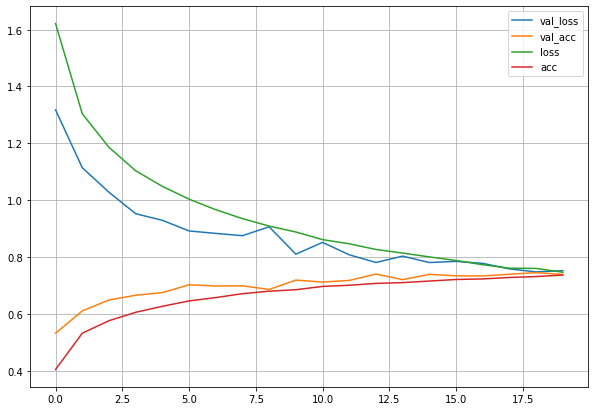

In [17]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

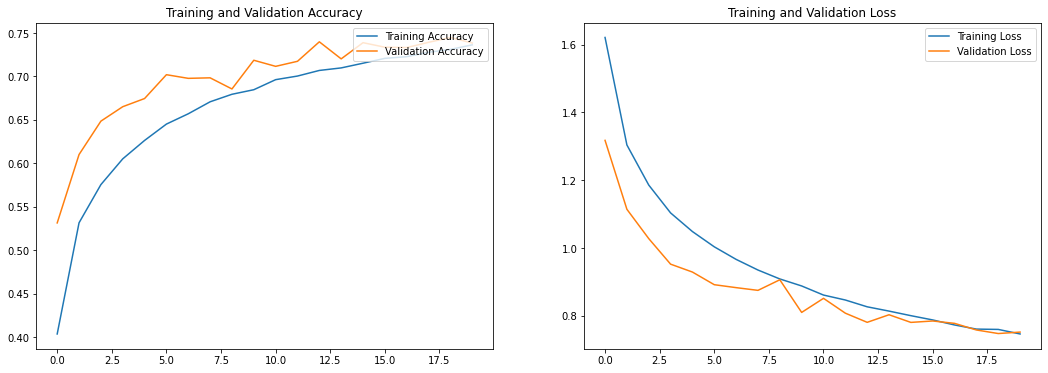

In [19]:
# Plot accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['acc']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['acc'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
8. Save the Model with the Best Validation Accuracy

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('model_CNN_CIFAR.h5')

9. Visualize Some Predictions

In [21]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

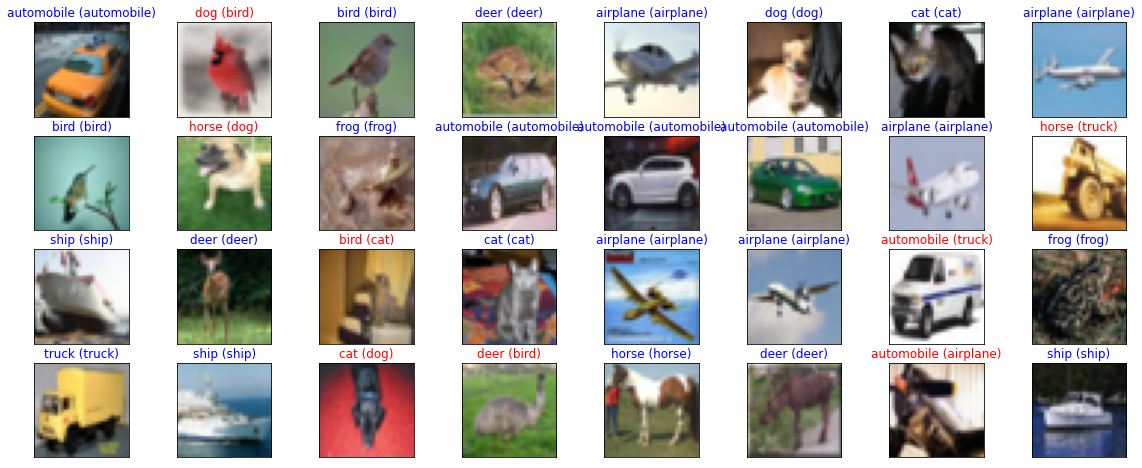

In [22]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))